<a href="https://colab.research.google.com/github/JakubPac/kurs_ml/blob/main/kmeans_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import plotly.express as px
import sklearn
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.3)

In [3]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples = 1000, centers = 4, cluster_std = 1.0, center_box = (-8.0, 8.0), random_state = 42)[0]
df = pd.DataFrame(data, columns = ['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width = 900, height = 500, title = 'Algorytm k-srednich', template = 'plotly_dark')

Algorytm k-srednich


In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [6]:
# wcss
kmeans.inertia_

1764.8750983569291

In [7]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.787374,5.599913,3
1,-4.761606,-5.204795,0
2,-4.945375,-5.428082,0
3,3.252542,0.728691,2
4,3.452312,0.075393,2


In [10]:
px.scatter(df, 'x1', 'x2', 'y_kmeans', width = 900, height = 500, title = 'Algorytm k-srednich - 5 klastrow', template = 'plotly_dark')

WCSS - Within-Custer Sum-of-Squared

In [11]:
wcss = []
for i in range(2,10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

print(wcss)

[20926.6262733145, 5391.661070434165, 1942.1891315367088, 1767.2540851027263, 1609.1793325876613, 1430.3628033089565, 1352.4599912448139, 1149.1936279627314]


In [12]:
wcss = pd.DataFrame(wcss, columns = ['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns = {'index' : 'clusters'})
wcss['clusters'] += 1
wcss.head()

,clusters,wcss
0,1,20926.626273
1,2,5391.661070
2,3,1942.189132
3,4,1767.254085
4,5,1609.179333


Metoda łokcia

In [13]:
px.line(wcss, x = 'clusters', y = 'wcss', width = 900, height = 500, title = 'WCSS', template = 'plotly_dark')

Wizualiacja klastrów

In [15]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width = 900, height = 500, title = 'Algorytm k-srednich - 3 klastry', template = 'plotly_dark')

In [17]:
centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = ['c1', 'c2'])
centers

,c1,c2
0,3.715995,1.647115
1,-5.369510,-5.437496
2,-4.566888,6.588606


In [18]:
fig = px.scatter(df, 'x1', 'x2', 'y_kmeans', width = 900, height = 500, title = 'Algorytm k-srednich - 3 klastry', template = 'plotly_dark')
fig.add_trace(go.Scatter(x = centers['c1'], y = centers['c2'], mode = 'markers', marker = {'size':12, 'color':'LightSkyBlue', 'line':
                                                                                           {'width':2, 'color': 'tomato'}}, showlegend = True))
fig.show()

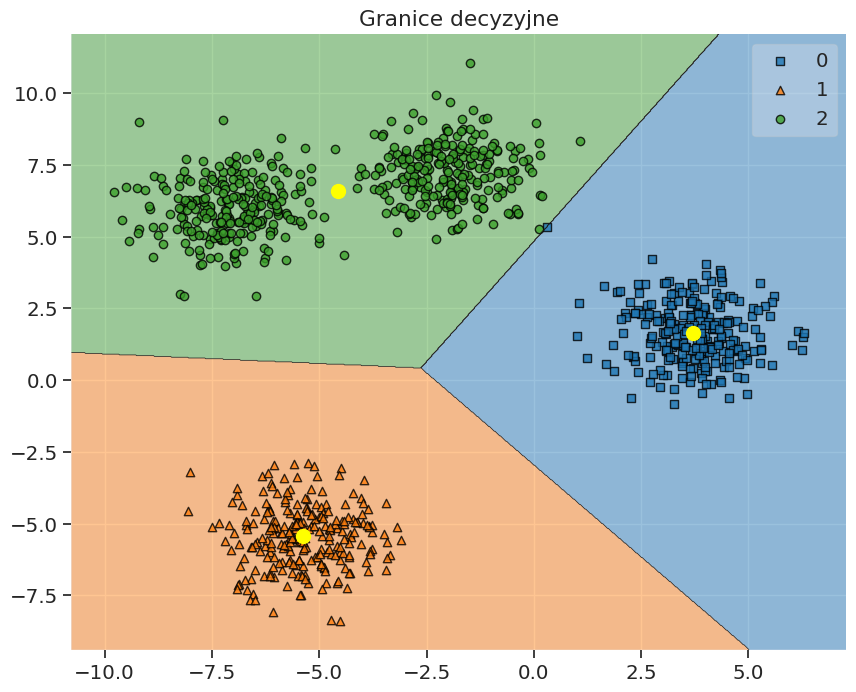

In [19]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10,8))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_kmeans, clf = kmeans, legend = 1)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow')
plt.show()